In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# 데이터 로딩
df_basketball = pd.read_csv('./datasets/basketball.csv')
df_basketball.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


In [91]:
df_basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      500 non-null    int64  
 1   Player  500 non-null    object 
 2   Pos     500 non-null    object 
 3   Age     500 non-null    int64  
 4   Tm      500 non-null    object 
 5   G       500 non-null    int64  
 6   GS      500 non-null    int64  
 7   MP      500 non-null    float64
 8   FG      500 non-null    float64
 9   FGA     500 non-null    float64
 10  FG%     498 non-null    float64
 11  3P      500 non-null    float64
 12  3PA     500 non-null    float64
 13  3P%     473 non-null    float64
 14  2P      500 non-null    float64
 15  2PA     500 non-null    float64
 16  2P%     495 non-null    float64
 17  eFG%    498 non-null    float64
 18  FT      500 non-null    float64
 19  FTA     500 non-null    float64
 20  FT%     483 non-null    float64
 21  ORB     500 non-null    float64
 22  DR

In [92]:
# 전처리
df_data = df_basketball[['Pos', 'TRB', 'BLK', '3P', 'AST']].copy()
df_data.head()

,Pos,TRB,BLK,3P,AST
0,PF,3.4,0.5,0.0,0.5
1,PG,0.4,0.0,0.0,0.3
2,C,8.9,0.7,0.0,1.9
3,C,9.0,1.0,0.0,5.4
4,C,4.5,1.1,1.2,1.9


In [93]:
df_data.describe() # 결측치 없음. 데이터가 정규 분포는 아닌 것 확인 됨.

,TRB,BLK,3P,AST
count,500.000000,500.000000,500.000000,500.000000
mean,3.646800,0.422800,0.973200,1.903800
std,2.314797,0.407544,0.897202,1.773317
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.100000,0.200000,0.700000
50%,3.200000,0.300000,0.700000,1.400000
75%,4.800000,0.600000,1.600000,2.400000
max,14.300000,2.700000,5.300000,10.900000


In [94]:
df_data['Pos'].value_counts()

SG       112
C         98
PF        96
SF        96
PG        85
SF-PF      3
SF-SG      2
SG-PG      2
C-PF       2
SG-SF      1
PF-C       1
PG-SG      1
PF-SF      1
Name: Pos, dtype: int64

In [95]:
df_data = df_data.loc[df_data['Pos'].isin(['C', 'SG', 'PG'])] # isin: df_data 중에 원하는 데이터 포함한 행만 골라줌 
df_data['Pos'].value_counts()

SG    112
C      98
PG     85
Name: Pos, dtype: int64

In [96]:
# SG + PG --> G
df_data.loc[(df_data['Pos'].isin(['PG', 'SG'])), 'Pos'] = 'G'
df_data['Pos'].value_counts()

G    197
C     98
Name: Pos, dtype: int64

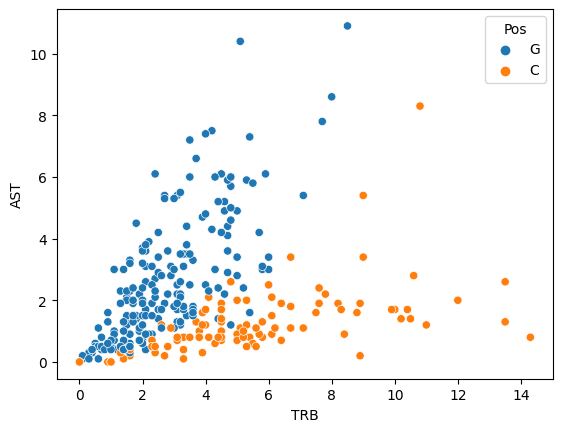

In [97]:
# 시각화
sns.scatterplot(x='TRB', y='AST', hue='Pos', data=df_data)
plt.show()

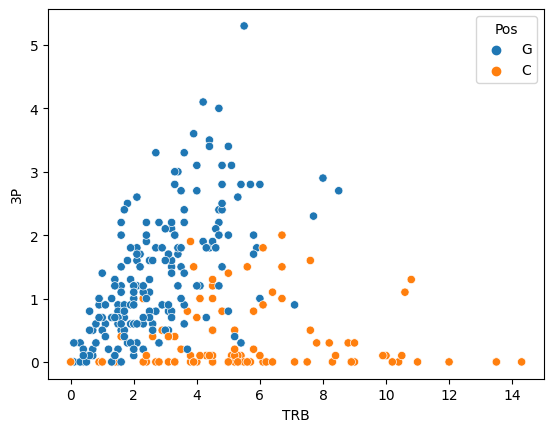

In [98]:
sns.scatterplot(x='TRB', y='3P', hue='Pos', data=df_data)
plt.show()

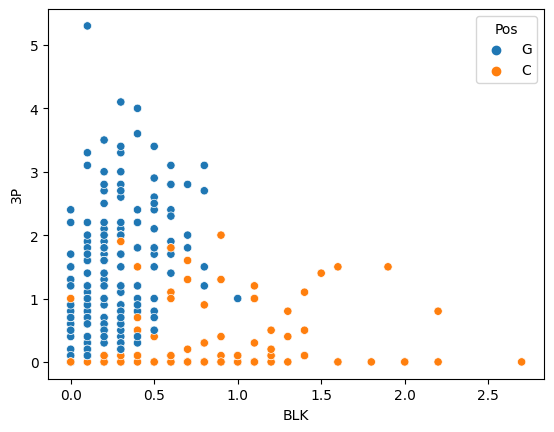

In [99]:
sns.scatterplot(x='BLK', y='3P', hue='Pos', data=df_data)
plt.show()

In [100]:
# 학습
y_df = df_data[['Pos']]
x_df = df_data[['TRB','AST']]

#print(y_df.values.ravel()) # values.ravel: column 이름 떼고 ravel은 1차원 변환이라 한개의 series로 만드는것
#print(x_df.values)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df.values, y_df.values.ravel(), test_size=0.25, random_state=15)

In [101]:
## 최적의 k 값
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(3, len(X_train)//2, 2)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [102]:
cv_scores

[0.9051383399209485,
 0.9233201581027668,
 0.9185770750988143,
 0.9140316205533597,
 0.9142292490118578,
 0.9187747035573123,
 0.9233201581027668,
 0.9187747035573123,
 0.9096837944664034,
 0.9051383399209486,
 0.9096837944664031,
 0.9096837944664031,
 0.9142292490118578,
 0.9185770750988143,
 0.9049407114624506,
 0.9049407114624506,
 0.900395256916996,
 0.9049407114624506,
 0.8958498023715414,
 0.9049407114624506,
 0.8960474308300395,
 0.8913043478260869,
 0.8867588932806324,
 0.8867588932806324,
 0.8867588932806324,
 0.8867588932806324,
 0.8913043478260869,
 0.8867588932806324,
 0.8867588932806324,
 0.8822134387351779,
 0.8913043478260869,
 0.8869565217391303,
 0.8869565217391303,
 0.882411067193676,
 0.882411067193676,
 0.882411067193676,
 0.8733201581027668,
 0.8642292490118576,
 0.8733201581027668,
 0.8687747035573123,
 0.8642292490118576,
 0.8687747035573123,
 0.8551383399209487,
 0.8551383399209487,
 0.8594861660079051,
 0.8503952569169961,
 0.8413043478260869,
 0.83221343873517

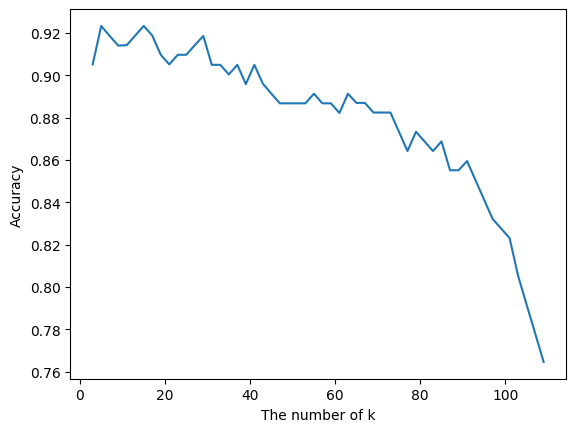

In [103]:
#시각화
sns.lineplot(x=k_values, y=cv_scores)
plt.xlabel('The number of k')
plt.ylabel('Accuracy')
plt.show()

In [104]:
# 최적의 k 찾기
max_idx = np.argmax(cv_scores)
k = k_values[max_idx]
k

5

In [105]:
# 학습
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [106]:
# 평가
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8648648648648649

In [107]:
knn.predict([[9.0, 5.4]])

array(['C'], dtype=object)

In [111]:
### 3가지 parameter ###
y_df = df_data[['Pos']]
x_df = df_data[['TRB','AST','3P']] # 여기와 최종 데이터만 변경

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df.values, y_df.values.ravel(), test_size=0.25, random_state=15)

## 최적의 k 값 위한 모델 생성
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(3, len(X_train)//2, 2)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# 최적의 k 찾기
max_idx = np.argmax(cv_scores)
k = k_values[max_idx]

# 학습
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

# 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

print(accuracy_score(y_test, pred))

# 최종 예측
knn.predict([[9.0, 5.4, 0.0]])

0.9054054054054054


array(['C'], dtype=object)